# House Price Prediction

In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dframe = pd.read_csv("Housing.csv")

In [3]:
dframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
dframe.shape

(545, 13)

##### so here we can see that there are 545 rows and 13 columns in out dataset 

# Now Data Preprocessing : 

In [9]:
dframe.isnull().sum() #checking for null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
count = 0
r,c = dframe.shape

dframe.drop_duplicates(inplace = True)

if dframe.shape==(r,c):
    print("\n The dataset doesn't contain any Duplicate values")
else:
    print("\n Duplicates are fixed now ....")


 The dataset doesn't contain any Duplicate values


In [13]:
from sklearn.preprocessing import LabelEncoder
categories = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

la = LabelEncoder()
dframe[categories]= dframe[categories].apply(la.fit_transform)

In [14]:
dframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<AxesSubplot:>

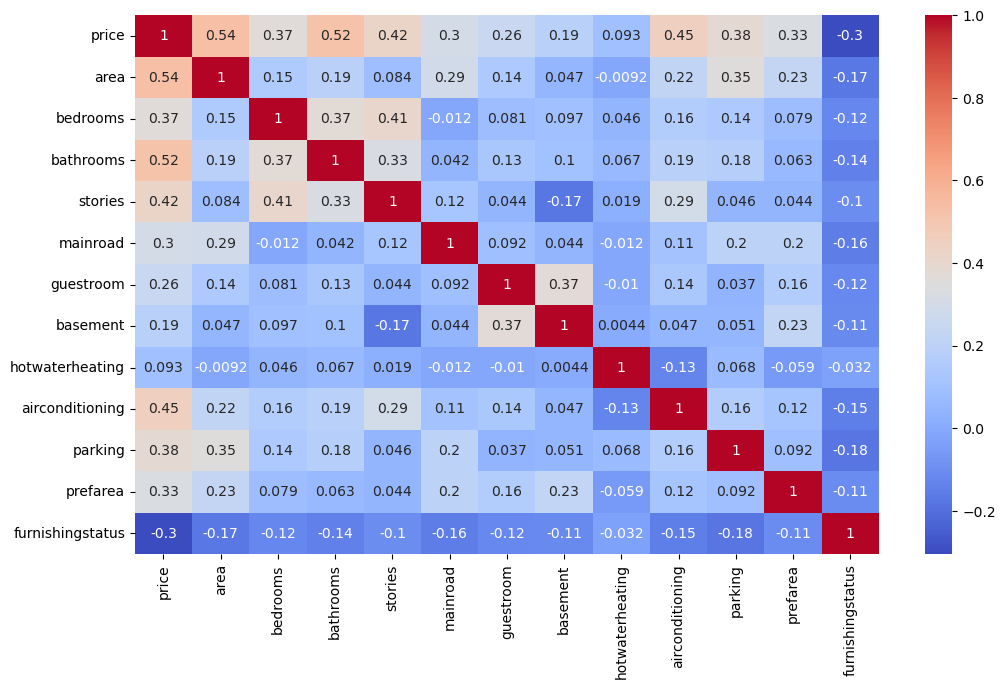

In [15]:
cor = dframe.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cor,cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='price'>

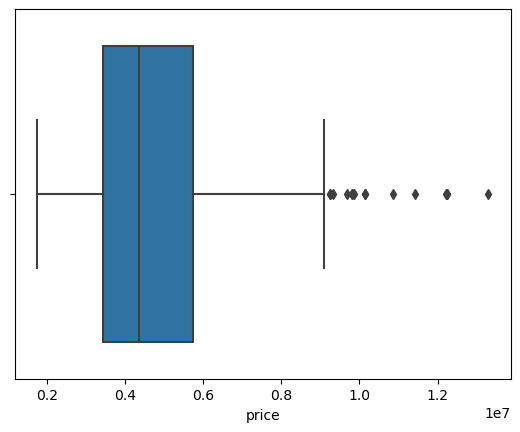

In [21]:
sns.boxplot(dframe['price'])

# Split the Dataset :

In [22]:
x = dframe.drop(['price'],axis = 1)
y = dframe['price']

In [23]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [24]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
len(x_train),len(x_test)

(381, 164)

# Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_predict = model.predict(x_test)

In [34]:
y_predict

array([5407508.87024418, 7097185.46706855, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034031, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725796, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095918, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702888, 3433682.48420934,
       7076940.4807988 , 4096598.07073102, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

# Model Evaluation 

In [35]:
print(model.intercept_)

124157.75864095893


In [36]:
coef_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])

In [37]:
coef_df

,Coefficient
area,2.530623e+02
bedrooms,8.273487e+04
bathrooms,1.117373e+06
stories,4.158011e+05
mainroad,4.083205e+05
guestroom,2.795340e+05
basement,4.849802e+05
hotwaterheating,6.199343e+05
airconditioning,6.800069e+05
parking,3.040783e+05


# Evaluation 

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [41]:
score

0.6435419628959106

In [42]:
mae

925543.5483156563